### 3. Feature Extraction (featureExtraction.ipynb)

# Feature Extraction Methods
Feature extraction is a key step in machine learning and data preprocessing. It transforms the data into a lower-dimensional space while retaining important information.

In this notebook, we will cover:
1. Linear methods:
   - Principal Component Analysis (PCA)
   - Linear Discriminant Analysis (LDA)
2. Nonlinear methods:
   - Independent Component Analysis (ICA)
   - Isomap and Multidimensional Scaling (MDS)


# Feature Extraction: Linear Methods

## 1. Principal Component Analysis (PCA)

### Explanation
Principal Component Analysis (PCA) is a **dimensionality reduction** technique.  
It finds new **orthogonal axes** (principal components) that maximize the **variance** in the data, allowing us to represent the data with fewer dimensions while preserving as much information (variance) as possible.

### Key Steps
1. Standardize the data.
2. Compute the covariance matrix.
3. Calculate the eigenvalues and eigenvectors of the covariance matrix.
4. Project the data onto the top $k$ eigenvectors corresponding to the largest eigenvalues.

### Formula
The PCA transformation can be expressed as:
$Z = X W$
Where:
- $X$: Original data matrix (centered).
- $W$: Matrix of eigenvectors (principal components).
- $Z$: Transformed data in the reduced-dimensional space.



### 📚Mathematical Explanation and Implementation of PCA

---

### Mathematical Steps of PCA

Suppose we have a dataset:

$
X = \{x^{(1)}, x^{(2)}, ..., x^{(n)}\}, \quad x^{(i)} \in \mathbb{R}^d
$

where:
- $n$ = number of samples
- $d$ = number of features.

Our goal: Find a new basis $W$ (a set of vectors) such that projecting $X$ onto $W$ maximizes the variance.

---

### Step-by-Step Mathematics



#### Step 1: Standardize the Data

First, we **center** the data (mean = 0):

$
\mu = \frac{1}{n} \sum_{i=1}^{n} x^{(i)}
$
$
\tilde{x}^{(i)} = x^{(i)} - \mu
$

Thus, our centered matrix:

$
\tilde{X} = X - \mu
$

Example in Python:
```python
import numpy as np

mu = np.mean(X, axis=0)
X_centered = X - mu


---

#### Step 2: Compute the Covariance Matrix

The **covariance matrix** captures how much two features vary together.

Mathematically:

$
\text{Cov}(X) = \frac{1}{n-1} \tilde{X}^T \tilde{X}
$

Where:
- $ \tilde{X} $ is the mean-centered data.
- $ n $ is the number of samples.

**Python Example:**

```python
cov_matrix = np.cov(X_centered, rowvar=False)
```
---

#### Step 3: Compute Eigenvalues and Eigenvectors

After obtaining the covariance matrix, the next step is to compute its **eigenvalues** and **eigenvectors**.

We solve the eigenvalue problem:

$
\text{Cov}(X) \, v = \lambda \, v
$

Where:
- $ v $ = eigenvector (direction of principal component),
- $ \lambda$ = eigenvalue (amount of variance along $ v $).

Each eigenvector points in a direction where the data varies the most, and the corresponding eigenvalue tells us how much variance is in that direction.

### Python Example:
```python
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
```
---

#### Step 4: Sort Eigenvectors by Decreasing Eigenvalues

After computing eigenvalues and eigenvectors, we need to **sort** them in order of **decreasing eigenvalues**.

- **Why?**  
  Eigenvalues indicate the amount of variance explained by each principal component.  
  We want the principal components that explain the most variance first.

### Procedure:

1. Sort the eigenvalues from largest to smallest.
2. Reorder the eigenvectors to match the sorted eigenvalues.

### Python Example:
```python
# Sort eigenvalues and eigenvectors
sorted_idx = np.argsort(eigenvalues)[::-1]  # Indices for sorting in descending order
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]
```
---

#### Step 5: Select the Top $k$ Eigenvectors

After sorting, we choose the top $k$ eigenvectors corresponding to the largest $k$ eigenvalues.

- **Why?**  
  These $k$ eigenvectors form a new basis that captures most of the variance in the data with fewer dimensions.

We construct the **projection matrix** $ W $:

$
W = [v_1, v_2, \dots, v_k]
$

Where:
- $ v_i$ are the selected eigenvectors,
- $ W \in \mathbb{R}^{d \times k} $ (d = original number of features, k = reduced dimension).

### Choosing $k$:

You can choose $k$ based on:
- A fixed number (e.g., $k=2$ for visualization).
- The percentage of variance you want to retain.

### Python Example:
```python
k = 2  # Number of principal components to keep
W = eigenvectors[:, :k]  # Take the first k eigenvectors
```

---

#### Step 6: Project the Data

Finally, we project the original **mean-centered** data onto the new $k$-dimensional space.

The projection is computed as:

$
Z = \tilde{X} W
$

Where:
- $ \tilde{X} $ is the mean-centered data matrix,
- $ W $ is the matrix of the top \(k\) eigenvectors,
- $ Z $ is the transformed data in \(k\)-dimensions.

### Python Example:
```python
X_pca = np.dot(X_centered, W)
```
Now, X_pca contains the data represented in the reduced k-dimensional space!

Each row of X_pca is a new representation of the original sample.

PCA has reduced the dimensionality while preserving as much variance as possible.

---

#### Step 7: (Optional) Reconstruct the Original Data (Inverse Transform)

Sometimes, after reducing the dimensions, you might want to **reconstruct** an approximation of the original data using the reduced features.

The reconstruction is done by:

$
\tilde{X}_{\text{approx}} = Z W^T
$

Where:

- $Z$ is the low-dimensional data obtained after projection,
- $ W^T $ is the transpose of the matrix of top eigenvectors.

To get the data in the original scale (before centering), add back the mean:

$
X_{\text{reconstructed}} = \tilde{X}_{\text{approx}} + \mu
$

Where:
- $ \mu $ is the mean vector that was subtracted during centering.

### Python Example:
```python
# Approximate the original centered data
X_approx = np.dot(X_pca, W.T)

# Recover the original data by adding the mean
X_reconstructed = X_approx + X_mean

Note: The reconstructed data will not be exactly the same as the original unless all components are used!


### Example
Below is an example of applying PCA on synthetic data and visualizing the results:



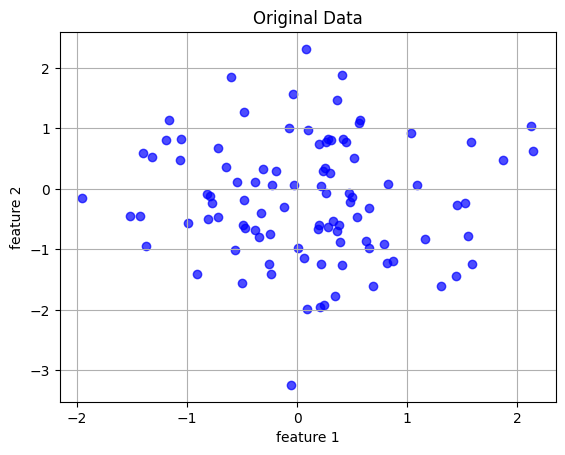

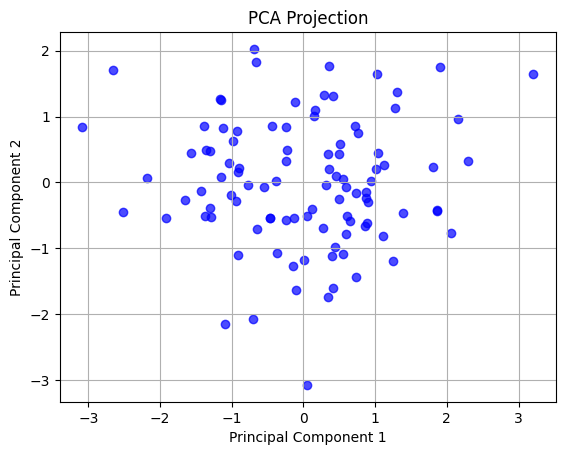

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(100, 3)
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.7)
plt.title("Original Data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.grid()
plt.show()
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

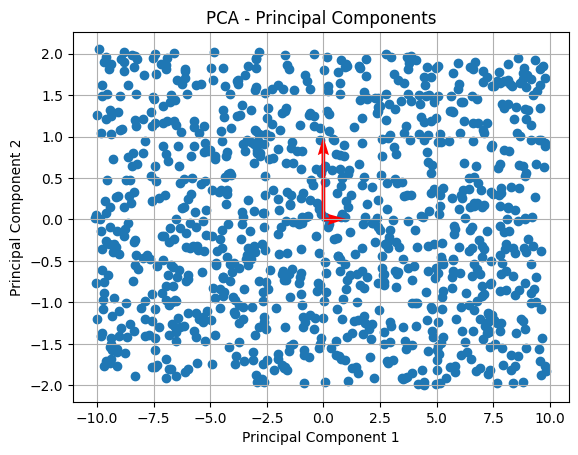

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
n_samples = 1000  # تعداد نقاط
width = 4  # عرض مستطیل
height = 10  # ارتفاع مستطیل
rotation_angle = np.pi / 2  # زاویه چرخش (مثلاً 30 درجه)

# تولید نقاط در محدوده مستطیل
x = np.random.uniform(-width / 2, width / 2, n_samples)
y = np.random.uniform(-height , height , n_samples)

rect_data = np.column_stack((x, y))

# ایجاد ماتریس چرخش
rotation_matrix = np.array([
    [np.cos(rotation_angle), -np.sin(rotation_angle)],
    [np.sin(rotation_angle), np.cos(rotation_angle)]
])

# اعمال چرخش روی نقاط مستطیل
rotated_data = rect_data @ rotation_matrix.T
data = rotated_data
#data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)


principal_components = pca.components_


plt.scatter(pca_result[:, 0], pca_result[:, 1], label='Data Points')
origin = np.zeros((2,))  
for i in range(len(principal_components)):
    plt.quiver(origin[0], origin[1], principal_components[i, 0], principal_components[i, 1], angles='xy', scale_units='xy', scale=1, color='r')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Principal Components')
plt.grid(True)
plt.show()


## 2. Linear Discriminant Analysis (LDA)

### Explanation
Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique. It aims to maximize the separation between multiple classes by projecting the data onto a lower-dimensional space.

### Goal of LDA

- Find a projection vector $ w $ that **maximizes the separation between classes**.
- Project the data onto $ w $ so that:
  
  - The **between-class variance** is **maximized**.
    
  - The **within-class variance** is **minimized**.
    
### Key Steps
1. Compute the within-class scatter matrix ($S_W$).
2. Compute the between-class scatter matrix ($S_B$).
3. Find the eigenvalues and eigenvectors of $S_W^{-1} S_B$.
4. Select the top eigenvectors for projection.

### Formula
The optimal projection matrix $W$ is given by:
$W = \text{argmax}_W \frac{|W^T S_B W|}{|W^T S_W W|}
$
Where:
- $S_W$: Within-class scatter matrix.
- $S_B$: Between-class scatter matrix.


---
## Step by step implementation

### Step 1: Define Mean Vectors

For each class $ i$, compute the **mean vector**:

$
\mu_i = \frac{1}{N_i} \sum_{x \in C_i} x
$

Where:

- $ \mu_i $ = mean of class $i $,
  
- $ N_i $ = number of samples in class \$ i $,
  
- $ C_i $ = set of samples belonging to class $ i$.

Also, compute the **overall mean**:

$
\mu = \frac{1}{N} \sum_{i=1}^c \sum_{x \in C_i} x
$

Where:
- $ N$ = total number of samples,
  
- $ c $ = number of classes.

---

### Step 2: Compute Scatter Matrices

#### 2.1. Within-class Scatter Matrix \( S_W \)

Measures the scatter **inside** each class:

$
S_W = \sum_{i=1}^c \sum_{x \in C_i} (x - \mu_i)(x - \mu_i)^T
$

- Sum of covariance matrices of each class.

#### 2.2. Between-class Scatter Matrix \( S_B \)

Measures the scatter **between** the class means:

$
S_B = \sum_{i=1}^c N_i (\mu_i - \mu)(\mu_i - \mu)^T
$

- Weighted by the number of samples in each class.

---

### Step 3: Solve the Generalized Eigenvalue Problem

We want to maximize the **ratio** of the between-class scatter to the within-class scatter:

$
\text{Objective:} \quad \max_w \frac{w^T S_B w}{w^T S_W w}
$

This leads to the **generalized eigenvalue problem**:

$
S_W^{-1} S_B w = \lambda w
$

Where:
- $ \lambda $ are eigenvalues,
- $ w $ are the corresponding eigenvectors.

---

### Step 4: Select Linear Discriminants

- Sort the eigenvectors by decreasing eigenvalues.
- Select the top $ k $ eigenvectors to form the transformation matrix $ W$.

The new reduced feature space is:

$
Z = X W
$

Where:

- $ X$ = data matrix,
  
- $W $ = selected eigenvectors (linear discriminates),

- $ Z$ = transformed data in lower dimensions.

---

## Important Notes:

- **PCA vs LDA**:
  - PCA is unsupervised; it maximizes total variance without using labels.
  - LDA is supervised; it tries to maximize separability between known classes.
- In **binary classification** (2 classes), LDA reduces the data to **1 dimension**.

![pca_lda](images/pca_lda.png)



### Linear Discriminant Analysis (LDA) Optimization Derivation details

## Objective function

In LDA, the goal is to find a projection vector \( w \) that maximizes the ratio of between-class scatter to within-class scatter:

$
J(w) = \frac{w^T S_B w}{w^T S_W w}
$

where:
- $ S_B $ is the between-class scatter matrix,
- $ S_W $ is the within-class scatter matrix.

---

## Problem with direct maximization

Directly maximizing $ w^T S_B w$ is not meaningful because $ w $ can be scaled arbitrarily to make $ J(w)$ infinite.  
Thus, we impose a constraint to make the problem well-posed:

$
w^T S_W w = 1
$

---

## Formulating the Lagrangian

We set up the constrained optimization using a Lagrangian function:

$
\mathcal{L}(w, \lambda) = w^T S_B w - \lambda (w^T S_W w - 1)
$

where $ \lambda $ is the Lagrange multiplier.

---

## Taking the derivative

We differentiate $ \mathcal{L} $with respect to $ w $ and set the derivative equal to zero:

$
\frac{\partial \mathcal{L}}{\partial w} = 2 S_B w - 2 \lambda S_W w = 0
$

Dividing through by 2:

$
S_B w = \lambda S_W w
$

---

## Generalized eigenvalue problem

Rearranging the equation:

$
S_W^{-1} S_B w = \lambda w
$

Thus, we have a **generalized eigenvalue problem** where:

- $w $ are the eigenvectors,

- $ \lambda$ are the eigenvalues.

---

## How to compute $ w $

1. Compute the scatter matrices $ S_W $ and $ S_B $ from the data.
2. Solve the eigenvalue problem:

$
S_W^{-1} S_B w = \lambda w
$

3. Select the eigenvectors $ w $ corresponding to the largest eigenvalues $ \lambda$.
4. Use these eigenvectors as the new axes (discriminant directions) for projection.

---

## Important notes

- In binary classification (2 classes), there is at most **one** discriminant direction.
- In general, for $ c $ classes, LDA provides up to $ c - 1 $ discriminant directions.


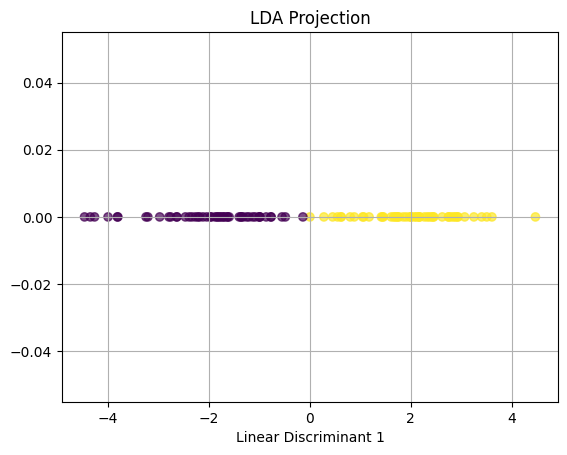

In [5]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)

# Apply LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Plot results
import matplotlib.pyplot as plt
plt.scatter(X_lda, [0] * len(X_lda), c=y, cmap='viridis', alpha=0.7)
plt.title("LDA Projection")
plt.xlabel("Linear Discriminant 1")
plt.grid()
plt.show()

## 3. Nonlinear Methods

Nonlinear methods are used for dimensionality reduction when the data lies on a nonlinear manifold. These techniques aim to preserve the intrinsic structure of the data in a lower-dimensional space.

---

### 3.1 Independent Component Analysis (ICA)

#### Explanation
Independent Component Analysis (ICA) is a technique used to separate multivariate signals into additive subcomponents. It assumes that the subcomponents are **non-Gaussian and statistically independent**. ICA is widely used in applications like source separation (e.g., separating audio signals).

<center>
<img src = "images/ica.png"  width = "700"/>

</center>


#### Key Steps
1. Center and whiten the data.
2. Maximize the statistical independence of components using measures like kurtosis or negentropy.
3. Extract the independent components.

#### Formula
The ICA model can be represented as:
\[
X = AS
\]
Where:
- \(X\): Observed data matrix.
- \(A\): Mixing matrix.
- \(S\): Independent components.

The goal is to estimate \(S\) and \(A\) such that the components in \(S\) are independent.



# 📘 Mathematical Derivation

## 1. ICA Model: Linear Mixture

We assume we observe **mixed signals**:

$$
\mathbf{x} = \mathbf{A} \mathbf{s}
$$

- $ \mathbf{x} \in \mathbb{R}^n $: observed (mixed) signals  
- $ \mathbf{s} \in \mathbb{R}^n $: unknown source signals (statistically independent)  
- $ \mathbf{A} \in \mathbb{R}^{n \times n} $: unknown mixing matrix  

**Goal**: Estimate an unmixing matrix $ \mathbf{W} \approx \mathbf{A}^{-1} $, such that:

$$
\hat{\mathbf{s}} = \mathbf{W} \mathbf{x}
$$

---

## 2. Assumptions

- The sources $s_i$ are statistically **independent**.
- At most one source can be **Gaussian** (for identifiability).
- The mixing is **linear and instantaneous**.

---

## 3. Preprocessing: Centering and Whitening

### a. Centering

Subtract the mean of $ \mathbf{x} $:

$$
\mathbf{x}_{\text{centered}} = \mathbf{x} - \mathbb{E}[\mathbf{x}]
$$

### b. Whitening

We transform $ \mathbf{x} $ so its components are uncorrelated and have unit variance.

1. Covariance matrix:

$$
\mathbf{C}_x = \mathbb{E}[\mathbf{x} \mathbf{x}^\top]
$$

2. Eigen-decomposition:

$$
\mathbf{C}_x = \mathbf{E} \mathbf{D} \mathbf{E}^\top
$$

3. Whitening transform:

$$
\mathbf{z} = \mathbf{D}^{-1/2} \mathbf{E}^\top \mathbf{x}
$$

Now:

$$
\mathbb{E}[\mathbf{z} \mathbf{z}^\top] = \mathbf{I}
$$

---

## 4. Objective: Maximize Non-Gaussianity

According to the **central limit theorem**, a sum of independent variables is more Gaussian. So, **to find independent components**, we **maximize non-Gaussianity**.

---

## 5. Measure of Non-Gaussianity: Negentropy

Differential entropy:

$$
H(y) = -\int p(y) \log p(y) \, dy
$$

Negentropy:

$$
J(y) = H(y_{\text{gauss}}) - H(y)
$$

Where $ y_{\text{gauss}} $ is a Gaussian variable with the same variance as \( y \).  
Negentropy is always non-negative and zero only for Gaussian variables.

---

## 6. Approximate Negentropy (FastICA)

Instead of computing entropy directly, use a contrast function:

$$
J(y) \approx \left[\mathbb{E}[G(y)] - \mathbb{E}[G(\nu)]\right]^2
$$

Where:

- $ \nu \sim \mathcal{N}(0,1) $
- $ G(u) $ is a non-quadratic function such as:

  - $ G_1(u) = \frac{1}{a} \log \cosh(a u) $
  - $ G_2(u) = -\exp(-u^2 / 2) $
  - $ G_3(u) = \frac{u^4}{4} $

---

## 7. FastICA Algorithm (One Component)

Let $ \mathbf{w} $ be the weight vector.

1. Initialize $ \mathbf{w} $ randomly.

2. Iterate until convergence:

$$
\mathbf{w}_{\text{new}} = \mathbb{E}[\mathbf{z} g(\mathbf{w}^\top \mathbf{z})] - \mathbb{E}[g'(\mathbf{w}^\top \mathbf{z})] \mathbf{w}
$$

Where:

- $ g(u) = G'(u)$ is the derivative of contrast function

3. Normalize:

$$
\mathbf{w}_{\text{new}} \leftarrow \frac{\mathbf{w}_{\text{new}}}{\|\mathbf{w}_{\text{new}}\|}
$$

4. Check convergence (e.g., $ |\mathbf{w}^\top \mathbf{w}_{\text{new}}| \approx 1 $)

---

## 8. Extracting Multiple Components

To find multiple vectors $\mathbf{w}_1, \dots, \mathbf{w}_n $, use **deflation** or **symmetric decorrelation**:

- Decorrelate using Gram-Schmidt
- Or ensure $ \mathbf{W} \mathbf{W}^\top = \mathbf{I} $ after each iteration

---

## ✅ Final Output

The estimated sources:

$$
\hat{\mathbf{s}} = \mathbf{W} \mathbf{z}
$$

Where:

- $ \mathbf{z} $: whitened signal
- $ \mathbf{W} $: matrix of demixing vectors

---

## 📌 Summary Table

| Step | Description |
|------|-------------|
| 1 | Model: $ \mathbf{x} = \mathbf{A} \mathbf{s} $ |
| 2 | Assumptions: independence, non-Gaussianity |
| 3 | Preprocessing: centering and whitening |
| 4 | Objective: maximize non-Gaussianity |
| 5 | Measure: negentropy or contrast functions |
| 6 | Optimization via FastICA |
| 7 | Extract multiple components |
| 8 | Final sources: $ \hat{\mathbf{s}} = \mathbf{W} \mathbf{z} $ |

---


#### Example
Below is an example of applying ICA to separate mixed signals:


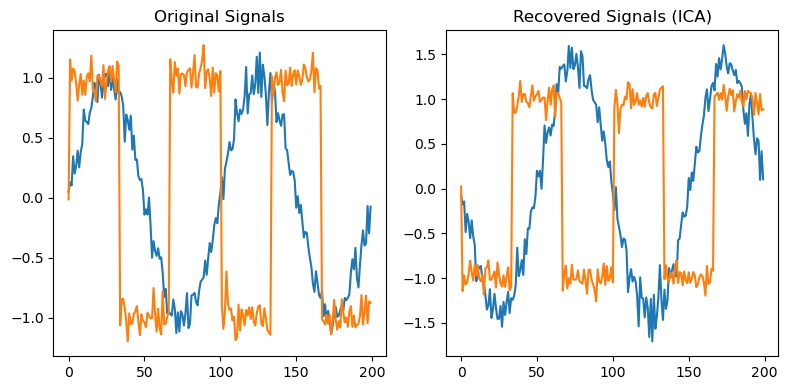

In [24]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Generate synthetic signals
np.random.seed(42)
S = np.c_[np.sin(2 * np.pi * np.arange(200) / 100),
          np.sign(np.sin(3 * np.pi * np.arange(200) / 100))]
S += 0.1 * np.random.normal(size=S.shape)

# Mix signals
A = np.array([[1, 0.5], [0.5, 1]])
X = S.dot(A.T)

# Apply ICA
ica = FastICA(n_components=2)
S_ica = ica.fit_transform(X)

# Plot results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(S)
plt.title("Original Signals")
plt.subplot(1, 2, 2)
plt.plot(S_ica)
plt.title("Recovered Signals (ICA)")
plt.tight_layout()
plt.show()


### 3.2 Isomap and Multidimensional Scaling (MDS)

#### Explanation
Isomap and Multidimensional Scaling (MDS) are nonlinear dimensionality reduction techniques used to embed high-dimensional data into a lower-dimensional space while preserving the geometric structure or pairwise distances.

- **Isomap**: Enhances classical MDS by preserving geodesic distances (shortest paths on the data manifold). It uses a k-nearest neighbors graph to compute geodesic distances.
- **MDS**: Attempts to preserve pairwise distances or dissimilarities in the reduced space.

---

#### Key Steps for Isomap
1. Construct a k-nearest neighbors graph from the data.
2. Compute geodesic distances between all pairs of data points using shortest path algorithms (e.g., Dijkstra's or Floyd-Warshall).
3. Apply classical MDS to the geodesic distance matrix to obtain the lower-dimensional embedding.

---

#### Formula for MDS
Classical MDS minimizes the stress function:
$ \text{Stress}(X) = \sum_{i < j} \left( d_{ij} - \|x_i - x_j\| \right)^2$
Where:
- $d_{ij}$: Distance between points \(i\) and \(j\) in the original space.
- $\|x_i - x_j\|$: Distance between projected points in the reduced space.

---

## 🌐 Multi-Dimensional Scaling (MDS) – A Complete Example

### 📌 What is MDS?

**Multi-Dimensional Scaling (MDS)** is a dimensionality reduction technique that takes a **distance matrix** (or dissimilarity matrix) as input and finds a **low-dimensional representation** of the data where the **distances between points** are preserved as closely as possible.

It is useful when we know how far objects are from each other but do not know their exact positions.

---

### 🧮 Example: 4 Cities and Pairwise Distances

Suppose we have 4 cities, and we know the pairwise distances between them in kilometers:

|       | A   | B   | C   | D   |
|-------|-----|-----|-----|-----|
| **A** | 0   | 2   | 6   | 10  |
| **B** | 2   | 0   | 5   | 9   |
| **C** | 6   | 5   | 0   | 4   |
| **D** | 10  | 9   | 4   | 0   |

This is our **distance matrix**.

---

## 🧠 Goal

Find a 2D representation of these cities so that the Euclidean distances between them approximate the original distances.

---

## 🔍 How MDS Works

1. Start with a dissimilarity matrix (pairwise distances).
2. MDS finds coordinates in 2D (or any target dimension) that best preserve these distances.
3. Output is a set of points that can be plotted to visualize relative positions.

---

## 🛠️ Python Code: Applying MDS

```python
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Distance matrix
distances = np.array([
    [0, 2, 6, 10],
    [2, 0, 5, 9],
    [6, 5, 0, 4],
    [10, 9, 4, 0]
])

cities = ['A', 'B', 'C', 'D']

# Apply MDS to project into 2D
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
coords = mds.fit_transform(distances)

# Plot the result
plt.figure(figsize=(6, 5))
plt.scatter(coords[:, 0], coords[:, 1], c='blue')

# Label points
for i, city in enumerate(cities):
    plt.text(coords[i, 0] + 0.2, coords[i, 1] + 0.2, city, fontsize=12)

plt.title("2D Projection using MDS")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.grid(True)
plt.axis('equal')
plt.show()




#### Example: Applying Isomap
```python


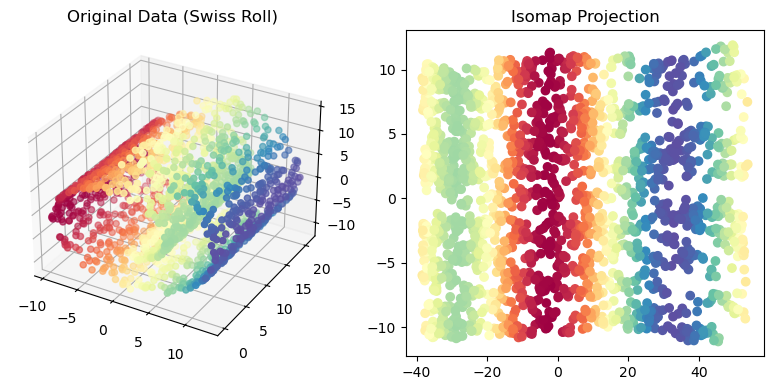

In [36]:
from sklearn.manifold import Isomap
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

# Generate synthetic Swiss roll data
X, _ = make_swiss_roll(n_samples=2000, noise=0.05)

# Apply Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X)

# Plot results
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X[:, 0], cmap='Spectral')
ax.set_title("Original Data (Swiss Roll)")
plt.subplot(122)
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=X[:, 0], cmap='Spectral')
plt.title("Isomap Projection")
plt.tight_layout()
plt.show()


Example: Applying MDS

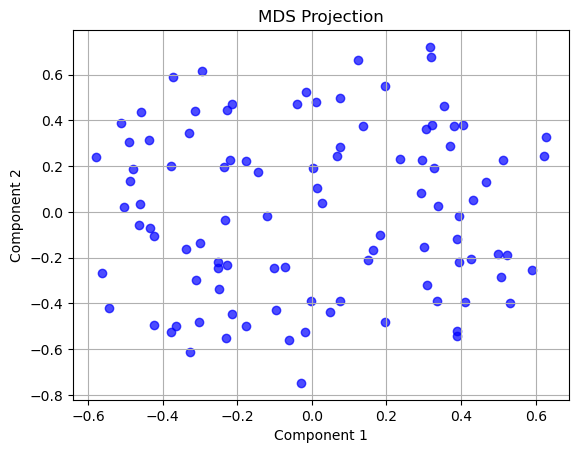

In [31]:
from sklearn.manifold import MDS
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3)

# Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

# Plot results
plt.scatter(X_mds[:, 0], X_mds[:, 1], c='blue', alpha=0.7)
plt.title("MDS Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid()
plt.show()


Visualization
Both Isomap and MDS enable visualizing complex high-dimensional data in a lower-dimensional space while preserving the geometric relationships:

Isomap is particularly useful for manifold learning and preserving nonlinear structures.
MDS is versatile for distance-preserving projections.
These methods are commonly used in exploratory data analysis to gain insights into the underlying structure of the data.

# Kernel Principal Component Analysis (Kernel PCA)

Kernel Principal Component Analysis (Kernel PCA) is a **nonlinear extension** of Principal Component Analysis (PCA) that allows for **dimensionality reduction** in cases where the relationship among data is nonlinear. This is achieved by implicitly mapping the original data into a **higher-dimensional feature space** using a **kernel function**, and then performing linear PCA in this new space.

---

## Motivation

Linear PCA fails to capture nonlinear structures in data because it relies on the variance of features in the original input space. Kernel PCA addresses this limitation by:
- Mapping data to a high-dimensional space where linear separation is possible.
- Computing principal components in this transformed space without explicitly computing the mapping, using **kernel trick**.

---

## Mathematical Formulation

Let $ \mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_n \in \mathbb{R}^d $ be the input data points.

### 1. Nonlinear Mapping to Feature Space

Map the data using a nonlinear function:

$$
\phi: \mathbb{R}^d \to \mathcal{F}, \quad \mathbf{x}_i \mapsto \phi(\mathbf{x}_i)
$$

where $ \mathcal{F}$ is a (possibly infinite-dimensional) Hilbert space.

### 2. Compute the Kernel Matrix

Define a kernel function $ k(\mathbf{x}_i, \mathbf{x}_j) = \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle $.

The kernel matrix $ \mathbf{K} \in \mathbb{R}^{n \times n} $ is:

$$
\mathbf{K}_{ij} = k(\mathbf{x}_i, \mathbf{x}_j)
$$

### 3. Center the Kernel Matrix

Center the kernel matrix in feature space:

$$
\mathbf{K}_{\text{centered}} = \mathbf{K} - \mathbf{1}_n \mathbf{K} - \mathbf{K} \mathbf{1}_n + \mathbf{1}_n \mathbf{K} \mathbf{1}_n
$$

where $ \mathbf{1}_n $ is an $ n \times n $ matrix with all entries equal to $ \frac{1}{n} $.

#### 📌 What Actually Needs to Be Done

To properly center in **feature space**, the new kernel entries must be:

$$
k_{\text{centered}}(\mathbf{x}_i, \mathbf{x}_j) = \langle \phi(\mathbf{x}_i) - \bar{\phi}, \, \phi(\mathbf{x}_j) - \bar{\phi} \rangle
$$

where:

$$
\bar{\phi} = \frac{1}{n} \sum_{i=1}^n \phi(\mathbf{x}_i)
$$

is the **mean of the data in the feature space**.

---

### 🔍 Expanding the Inner Product

$$
k_{\text{centered}}(\mathbf{x}_i, \mathbf{x}_j)
= \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle
- \langle \bar{\phi}, \phi(\mathbf{x}_i) \rangle
- \langle \bar{\phi}, \phi(\mathbf{x}_j) \rangle
+ \langle \bar{\phi}, \bar{\phi} \rangle
$$

Each of these terms is an **inner product** in the feature space, which can be computed using the kernel function \( k(\cdot, \cdot) \), avoiding explicit computation of \( \phi(\cdot) \).

---

### ✅ Final Centered Kernel Matrix

This leads to the following formula for centering the kernel matrix:

$$
\mathbf{K}_{\text{centered}} = \mathbf{K} - \mathbf{1}_n \mathbf{K} - \mathbf{K} \mathbf{1}_n + \mathbf{1}_n \mathbf{K} \mathbf{1}_n
$$

Where:
- $ \mathbf{K} $ is the original kernel matrix
- $ \mathbf{1}_n$ is an $ n \times n $ matrix with all elements equal to $ \frac{1}{n} $

---

### ⚙️ What This Formula Does

- **Subtracts the mean of each row and column** from the kernel matrix
- **Adds back the overall mean** (since it’s subtracted twice)
- **Centers the data in the feature space**, without ever computing \( \phi(\cdot) \) explicitly (thanks to the **kernel trick**)

### 4. Solve the Eigenvalue Problem

Find eigenvalues $ \lambda$ and eigenvectors $ \mathbf{v} \in \mathbb{R}^n $ of the centered kernel matrix:

$$
\mathbf{K}_{\text{centered}} \mathbf{v} = \lambda \mathbf{v}
$$

Normalize eigenvectors such that:

$$
\lambda \, \mathbf{v}^\top \mathbf{v} = 1
$$

### 5. Project New Data Points

To project a new data point $ \mathbf{x} $ onto the $k $-th principal component:

$$
\text{PC}_k(\mathbf{x}) = \sum_{i=1}^n v_i^{(k)} \, k(\mathbf{x}_i, \mathbf{x})
$$

where $ \mathbf{v}^{(k)} $ is the $ k $-th normalized eigenvector.

---

## Common Kernels

- **Linear Kernel:** $ k(\mathbf{x}, \mathbf{y}) = \mathbf{x}^\top \mathbf{y} $
- **Polynomial Kernel:** $k(\mathbf{x}, \mathbf{y}) = (\mathbf{x}^\top \mathbf{y} + c)^d $
- **Gaussian (RBF) Kernel:** $ k(\mathbf{x}, \mathbf{y}) = \exp\left(-\frac{\|\mathbf{x} - \mathbf{y}\|^2}{2\sigma^2}\right) $
- **Sigmoid Kernel:** $ k(\mathbf{x}, \mathbf{y}) = \tanh(\alpha \mathbf{x}^\top \mathbf{y} + c) $

---

## Summary

Kernel PCA enables:
- **Nonlinear dimensionality reduction**
- **Capturing complex data structures**
- **Working in high-dimensional space without explicitly computing it (via kernel trick)**

It is widely used in pattern recognition, denoising, and feature extraction in machine learning tasks where linear PCA is insufficient.


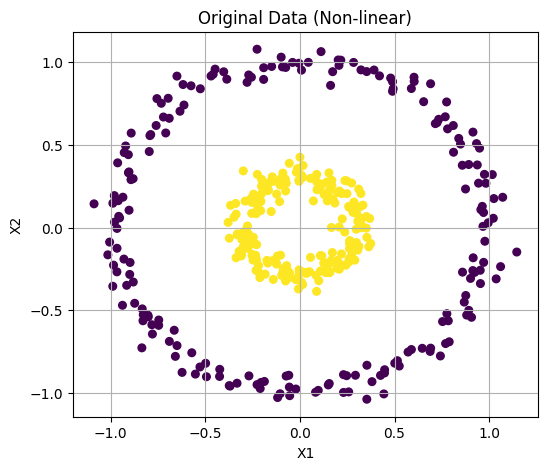

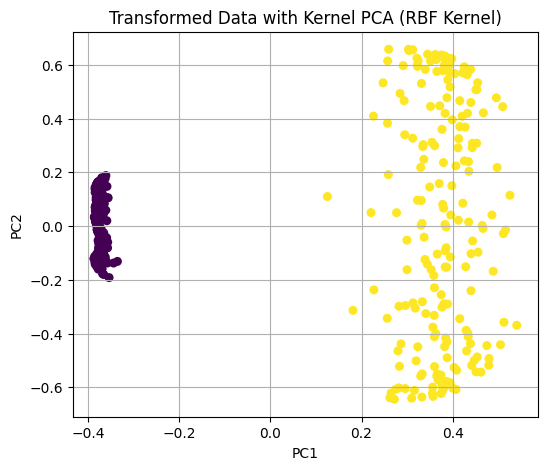

In [4]:
# 1. Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.decomposition import KernelPCA

# 2. Generate nonlinear data
X, y = make_circles(n_samples=400, factor=0.3, noise=0.05, random_state=42)

# 3. Plot original data
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Original Data (Non-linear)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

# 4. Apply Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=5)
X_kpca = kpca.fit_transform(X)

# 5. Plot transformed data
plt.figure(figsize=(6, 5))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis', s=30)
plt.title("Transformed Data with Kernel PCA (RBF Kernel)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
